In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET
import os
from os import listdir
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def annotated_image(name): 
    image_path = f"signature_data/images/{name}.jpg"
    xml_path = f"signature_data/annotations/{name}.xml"
    
    image = Image.open(image_path)
    
    tree = ET.parse(xml_path)
    root = tree.getroot()
    fig, ax = plt.subplots(1, figsize=(15, 15))
    ax.imshow(image)

    boxes = [] #extracted bounding boxes
    for obj in root.findall(".//object"):
        xmin = int(obj.find(".//bndbox/xmin").text)
        xmax = int(obj.find(".//bndbox/xmax").text)
        ymin = int(obj.find(".//bndbox/ymin").text)
        ymax = int(obj.find(".//bndbox/ymax").text)

        boxes.append([xmin,xmax,ymin,ymax])
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=.75, edgecolor='r', facecolor='none')
        
        ax.add_patch(rect)
    #plt.show() #there for line below, uncomment to see result
    plt.close(fig) #adding will allow image to close after viewing
    return boxes


#plt.show()

### Note
uncomment plt.show, run the line below, comment plt.show(), then run line to view image 

In [3]:
annotated_image("chicago_108.pdf_2")

[[160, 507, 1363, 1465],
 [943, 1443, 1659, 1758],
 [105, 697, 1754, 1893],
 [845, 1490, 1766, 1930],
 [195, 760, 1841, 2045],
 [981, 1506, 1869, 2050]]

In [4]:
folder_dir = "signature_data/"
image_data = []
image_names = []

In [5]:
for filename in os.listdir(os.path.join(folder_dir, 'images')): #in case of using a different directory. 
    if filename.endswith('.jpg'):
        image_name, _ = os.path.splitext(filename)  # Removes .jpg
        image_names.append(image_name)

In [6]:
image_names[:10]   #stores names

['chicago_108.pdf_2',
 'chicago_108.pdf_4',
 'chicago_109.pdf_2',
 'chicago_109.pdf_33',
 'chicago_109.pdf_41',
 'chicago_109.pdf_46',
 'chicago_109.pdf_48',
 'chicago_109.pdf_49',
 'chicago_109.pdf_50',
 'chicago_118.pdf_2']

In [7]:
import time

### Plan
- first create a dictionary of bounding boxes (all of them in all images)
- iterate through image_names --> find the bounding boxes using the annotated image function
- store it in b_boxes, where each row will contain a bounding box to some image

**Line below will take a (7-10min)

In [8]:
b_boxes = {}

start = time.time()
for name in image_names:  #append those anntated bounding boxes into the images 
    b_boxes[name] = annotated_image(name)
end = time.time()

total_time = end - start
total_time

3486.161466360092

## Options of DataFrame

** Discuss with team with is preferred before cleaning 

#### Option 1

In [51]:
df1 = pd.DataFrame(
    {
        'image_name': list(b_boxes.keys()),
        'bounding_boxes': list(b_boxes.values())
    }
)

#### Option 2

In [57]:
for name, boxes in b_boxes.items():
    image_data.extend(
        {'image_name': name, 'xmin': box[0], 'ymin': box[1], 'xmax': box[2], 'ymax': box[3]}
        for box in boxes
    )


KeyError: 0

In [15]:
df = pd.DataFrame(image_data)

## Note
#### stores image name and coordinates of bounding boxes, helps with image coordination.

<bold> ex) chicago_108.pdf_2  <bold>
- has around 6 bounding boxes, stores that coordinates pertaining to those
- treating each bounding box as it's individual row. 
*** can talk with team regarding storing it 

In [27]:
df.head(20)  

,image_name,xmin,ymin,xmax,ymax
0,chicago_108.pdf_2,160,507,1363,1465
1,chicago_108.pdf_2,943,1443,1659,1758
2,chicago_108.pdf_2,105,697,1754,1893
3,chicago_108.pdf_2,845,1490,1766,1930
4,chicago_108.pdf_2,195,760,1841,2045
5,chicago_108.pdf_2,981,1506,1869,2050
6,chicago_108.pdf_4,353,681,935,1174
7,chicago_108.pdf_4,122,872,1542,1677
8,chicago_109.pdf_2,1254,1420,143,210
9,chicago_109.pdf_33,178,667,1589,1713


In [30]:
df1.head()

,image_name,bounding_boxes
0,chicago_108.pdf_2,"[[160, 507, 1363, 1465], [943, 1443, 1659, 175..."
1,chicago_108.pdf_4,"[[353, 681, 935, 1174], [122, 872, 1542, 1677]]"
2,chicago_109.pdf_2,"[[1254, 1420, 143, 210]]"
3,chicago_109.pdf_33,"[[178, 667, 1589, 1713]]"
4,chicago_109.pdf_41,"[[634, 719, 1642, 1673]]"


In [31]:
df["image_name"].size   #including the bounding boxes

3328

In [32]:
df["image_name"].nunique()  #total size of image dataset

2058

In [33]:
df1["image_name"].size #same as nunique

2058

In [34]:
df.shape

(3328, 5)

In [35]:
df1.shape

(2058, 2)

### Note
- splitting both test and train, then clean data. 
- provided the test data with bounding boxes, so when using those images without it, then compare
- Image Size: Resizing images/ensure consistently resize the images and their corresponding bounding boxes.

In [37]:
X_train, X_test = train_test_split(df, test_size=0.4, random_state = 1234)   #need to discuss with team about right paramters

In [42]:
X_train1, X_test1 = train_test_split(df1, test_size=0.4, random_state = 1234) # just there if we choose

In [38]:
import cv2

In [39]:
# find the ratio of current image to current bounding box size, to proportional 224
# resize each image, then perform this 
# so      xmin * image.width / 224 = new xmin      similar for xmax    AND  ymin, and ymax
#check with team if this is their target size
resized = (800, 600)  # Desired target size??
new_boxes = [] #storing the new boxes that are scaled from the resized image
image_data = {}  # Dictionary to store scaling factors for each image

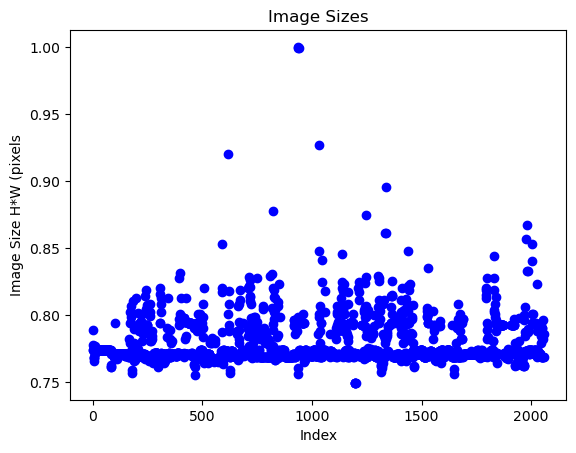

In [40]:
import matplotlib.image as mpimg

# Load the image
image_sizes = []
image_names = df1['image_name'].unique()


for image_name in image_names:
    path = os.path.join(folder_dir, 'images', f"{image_name}.jpg")
    image = mpimg.imread(path)

    
    height, width, = image.shape[:2]
    image_sizes.append(height*width)

max_image_size = max(image_sizes)

# Normalize image sizes (so that max size is 1)
normalized_sizes = [size / max_image_size for size in image_sizes]

# Plot normalized image sizes
plt.scatter(range(len(image_names)), normalized_sizes, color='blue')

plt.xlabel("Index")
plt.ylabel("Image Size H*W (pixels")
plt.title("Image Sizes")
plt.show()

In [41]:

for image_name in df1['image_name']:
    
    image = cv2.imread(os.path.join(folder_dir, 'images', f"{image_name}.jpg"))   #read image path
   
    
    og_height, og_width = image.shape[:2]
    image = cv2.resize(image, resized)
    height, width = image.shape[:2]

    w_scaled = width / og_width
    h_scaled = height / og_height

    
    image_data[image_name] = {  #store those resized paramters for bounding boxes
        'image': image,
        'w_scaled': w_scaled,
        'h_scaled': h_scaled
    }



In [44]:
for _, row in df.iterrows():
    image_name = row['image_name']               # Get the image name for the current row
    
    if image_name in image_data:        #check if it's in current image dictionary
        w_scaled = image_data[image_name]['w_scaled']   #take the scaled width/height
        h_scaled = image_data[image_name]['h_scaled']
        
        boxes.append({'image_name': image_name,    #store resized bounding boxes
                      'xmin': int(row['xmin'] * w_scaled),
                      'ymin':int(row['ymin'] * h_scaled),
                      'xmax':int(row['xmax'] * w_scaled),
                      'ymax': int(row['ymax'] * h_scaled)})


In [48]:
# Display the first original and resized image to check scaling
first_image_name = df['image_name'].unique()[0]
resized_image = image_data[first_image_name]['image']

cv2.imshow("Resized Image", resized_image)
cv2.waitKey(0)

-1

#### References for Filtering Methods
- <a href="https://docs.opencv.org/4.5.4/d7/d4d/tutorial_py_thresholding.html">Otsu's Binarization</a>
- <a href=""></a>
